<h1><center><b>Machine Learning</></center></h1>
<h3><center>Exercise 1 - KNN</center></h3>


<font color='red'>
Ido Aharon   
</font>


____________

In this exercise we will learn to:
1. Load and prepare datasets.
2. Implement KNN algorithm.

**Instructions:**
- Download the notebook with **"File"** -> **"Download .ipynb"**
- Drag the notebook to your Google Drive
- Run the cells one by one


### **1. Introduction to Colab and Numpy**

We use the Python programming language for all assignments in this course with the help of popular packages (like [numpy](https://numpy.org/), [matplotlib](https://matplotlib.org/), [sklearn](https://scikit-learn.org/stable/), [scipy](https://scipy.org/) and [pytorch](https://pytorch.org/)).

Go over this **[numpy tutorial](https://numpy.org/doc/stable/user/quickstart.html)** or this **[tutorial](https://cs231n.github.io/python-numpy-tutorial/)** before starting this assignment and **[this notebook](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb)** to understand how to work with basic packages and with Google Colab. It is important to go over them before starting this assignment.

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline

Play with NumPy here:

In [2]:
x = np.array([1,2,3])
y = np.array([4,5,6])
x, y

(array([1, 2, 3]), array([4, 5, 6]))

Pay attention: with NumPy, you can sum vectors in one line, you don't have to iterate over the elements.

In [3]:
x + y
# x - y
# x * y
# x**2
# (x - y)**2

array([5, 7, 9])

In [4]:
np.sum(x)
# np.mean(x)
np.sqrt(x)

array([1.        , 1.41421356, 1.73205081])

### **2. Data**

##Data
We'll use CIFAR10 dataset.
It is a very familiar dataset. Please read a little bit [here](https://www.cs.toronto.edu/~kriz/cifar.html).

To import the dataset, we'll use the torch library. Don't dig about this library now, we will learn about it better in the next time.

In [9]:
import torch
from torchvision import datasets,transforms
import torchvision

In [10]:
######################################################
##   Don't change this cell. Use it as a black box  ##
######################################################

transform = transforms.Compose(
    [transforms.ToTensor(),
     ])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=1)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10,
                                         shuffle=False, num_workers=1)

# CIFAR10 labels:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let's see a few images with their labels

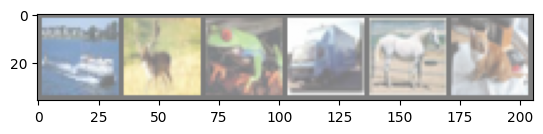

 ship  deer  frog truck horse   cat


In [11]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

testiter = iter(testloader)
test_images, test_labels = next(testiter)

# show images
imshow(torchvision.utils.make_grid(images[:6]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(6)))

Each image is represented as a RGB image.
each pixel has a number between 0 and 1 on each dimension.

In [12]:
images[0], images[0].size()

(tensor([[[0.4549, 0.4588, 0.4784,  ..., 0.5098, 0.5020, 0.4941],
          [0.4627, 0.4667, 0.4902,  ..., 0.3569, 0.2353, 0.4275],
          [0.4941, 0.5137, 0.5294,  ..., 0.1020, 0.0235, 0.2392],
          ...,
          [0.0627, 0.0627, 0.0549,  ..., 0.0510, 0.0392, 0.0471],
          [0.0627, 0.0549, 0.0627,  ..., 0.0824, 0.0627, 0.0667],
          [0.0353, 0.0196, 0.0275,  ..., 0.0627, 0.0431, 0.0667]],
 
         [[0.6353, 0.6314, 0.6392,  ..., 0.6667, 0.6549, 0.6353],
          [0.6275, 0.6196, 0.6353,  ..., 0.4902, 0.3765, 0.5765],
          [0.6392, 0.6431, 0.6471,  ..., 0.2039, 0.1451, 0.3843],
          ...,
          [0.2118, 0.1961, 0.1765,  ..., 0.1765, 0.1922, 0.2078],
          [0.2039, 0.1843, 0.1804,  ..., 0.1882, 0.2000, 0.2118],
          [0.1608, 0.1412, 0.1490,  ..., 0.1569, 0.1647, 0.1961]],
 
         [[0.8275, 0.8275, 0.8392,  ..., 0.8235, 0.8000, 0.8157],
          [0.8118, 0.8118, 0.8275,  ..., 0.5608, 0.4471, 0.6902],
          [0.8118, 0.8235, 0.8275,  ...,

CIFAR is a big datadset, let's use only 100 images and convert them to numpy arrays

#### Train Set

In [13]:
x_train = np.array(images)
y_train = np.array(labels)

In [14]:
x_train.shape, y_train.shape

((100, 3, 32, 32), (100,))

#### Test Set

In [15]:
x_test = np.array(test_images)
y_test = np.array(test_labels)
x_test.shape, y_test.shape

((10, 3, 32, 32), (10,))

### **3. KNN**

First of all, let's implement euclidean distance function, so we will be able to calculate closeness between images.

**A reminder**: the euclidean distance formula is:

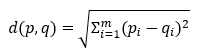

**Pay attention**: point representation might contains more than two numbers (means m>2).

In [16]:
import math

def euclidean_distance(p1, p2):
  p3 = p1 - p2
  p3 = p3 * p3
  sum = p3.sum()
  sum = math.sqrt(sum)
  return sum

Now, let's implement KNeighborsClassifier class.

In 'fit' function you have to get the inputs, and prepare the classifier for prediction (think what exactly you have to prepare)

In 'predict' fucntion you have to get a test set and return a numpy array contains the classes (that the model predicted) of each element from the test set.

We added a few more function declarations that might help you. Fill free to implement them (or not) and to add some more functions.

In adition, there are a few KNN implementations. You are allowed to implement your own algorithm.


In [17]:
class KNeighborsClassifier:
  def __init__(self, distance_metric, n_neighbors=None):
    self.k = n_neighbors
    self.metric = distance_metric
    self.images = None
    self.labels = None


  def fit(self, x, y):
    self.images = x
    self.labels = y

  def predict(self, x_test):
    answer = []
    for x in x_test:
      answer.append(self.predict_one(x))

    return np.array(answer)    

  def predict_one(self, x_point):
    neighbors = self.distance(x_point)
    neighbors = neighbors[0 : self.k] # slice only the first k neighbors
    return self.most_frequent(neighbors) # return the most common neighbor

  def most_frequent(self, List):
    counter = 0
    element = List[0]
     
    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            element = i
 
    return element
  
  def distance(self, x_test):
    all_distances = []
    for x in self.images:
      all_distances.append(self.metric(x, x_test))

    merged = list(zip(all_distances, self.labels)) # merge the distances with the tags
    merged.sort()
    merged = list(zip(*merged))[1] # extract only the tags

    return merged

  def nearest_neighbor(self, x_test):
    return self.distance(x_test)[0]

In [18]:
def error_rate(y_predict, y_true):
  """
  y_predict: the model's output
  y_true: the expected output
  """
  return np.mean(y_predict != y_true)
  

**Using KNN**

Use the KNeighborsClassifier class you've implemented with n_neighbors=1. Fit this KNN model to the training data.

In [19]:
knn = KNeighborsClassifier(euclidean_distance, n_neighbors=1)
knn.fit(x_train,y_train)

**Predictions and Evaluations**

Use the predict method to predict values using your KNN model and x_test. In addition, create a [confusion matrix](https://www.sciencedirect.com/topics/engineering/confusion-matrix) and a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Make sure you don't get any errors in this cell.

In [20]:
pred = knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[0 0 0 0 0 0 1]
 [0 0 1 0 0 0 1]
 [0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0]
 [0 1 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         3
           8       0.33      0.50      0.40         2

    accuracy                           0.10        10
   macro avg       0.05      0.07      0.06        10
weighted avg       0.07      0.10      0.08        10



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

**Choosing a K Value**

Implement a for loop in 'find_best_k' function (hint: use KNeighborsClassifier object) that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.
The function will return the best k, and the error rate of each k as a numpy array.

In [21]:
MIN_K = 1
MAX_K = 15

def find_best_k(min_k=1, max_k=15):
  best_k = 0
  best_error = 1.0
  error_rates = []

  for k in range(min_k, max_k):
    knn = KNeighborsClassifier(euclidean_distance, k)
    knn.fit(x_train, y_train)

    predicate = knn.predict(x_test)
    rate = error_rate(y_test, predicate)

    if rate <= best_error:
      best_error = rate
      best_k = k

    error_rates.append(rate)

  return best_k, np.array(error_rates)

  

In [22]:
best_k, error_rate = find_best_k(min_k=MIN_K, max_k=MAX_K)

Now create the following plot using the information from your for loop.

Text(0, 0.5, 'Error rate')

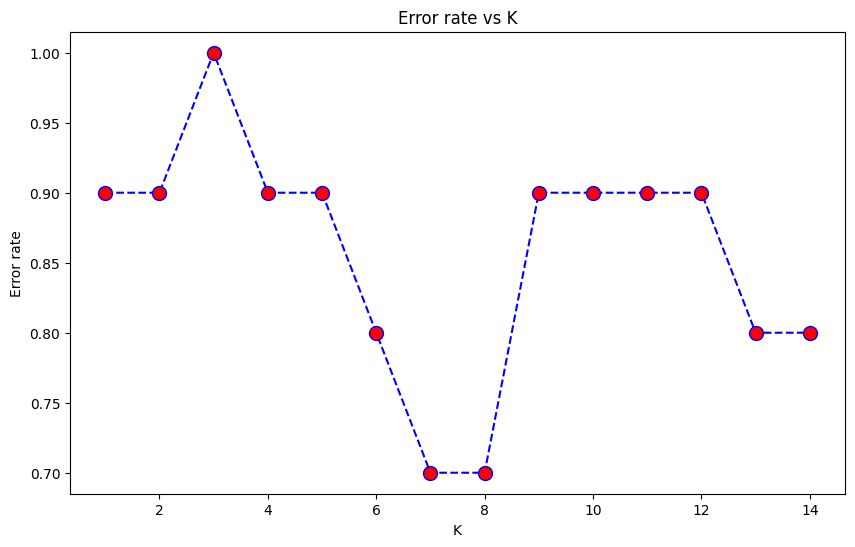

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(MIN_K,MAX_K),error_rate,color='blue',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

**Retrain with new K Value**

Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [24]:
knn = KNeighborsClassifier(euclidean_distance, best_k)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [25]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[0 0 0 0 0 1 0]
 [0 0 1 0 1 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0]
 [0 0 0 1 2 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         0
           3       0.50      0.50      0.50         2
           6       0.50      0.67      0.57         3
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         0

    accuracy                           0.30        10
   macro avg       0.14      0.17      0.15        10
weighted avg       0.25      0.30      0.27        10



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

**:)**